# Importation des librairies et des données

In [1]:
# importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn import dummy, metrics, preprocessing, linear_model, ensemble, svm
from xgboost import XGBRegressor

import time

In [2]:
# importation des données

data_2015 = pd.read_csv("final_data_2015.csv")
data_2016 = pd.read_csv("final_data_2016.csv")

# Préparation des tests et train sets

In [3]:
# séparation en train et test sets

from sklearn import model_selection

X_2015 = data_2015.drop(columns = ["SourceEnergyUse", "TotalGHGEmissions"])
y_energy_2015 = data_2015["SourceEnergyUse"]
y_emissions_2015 = data_2015["TotalGHGEmissions"]

X_2016 = data_2016.drop(columns = ["SourceEnergyUse", "TotalGHGEmissions"])
y_energy_2016 = data_2016["SourceEnergyUse"]
y_emissions_2016 = data_2016["TotalGHGEmissions"]

X_train_2015, X_test_2015, y_train_energy_2015, y_test_energy_2015 = model_selection.train_test_split(X_2015, 
                                                                                              y_energy_2015, 
                                                                                              test_size=0.3,
                                                                                              random_state=12)
X_train_2016, X_test_2016, y_train_energy_2016, y_test_energy_2016 = model_selection.train_test_split(X_2016, 
                                                                                              y_energy_2016,
                                                                                              test_size=0.3,
                                                                                              random_state=12)

y_train_emissions_2015 = y_emissions_2015.loc[y_train_energy_2015.index]
y_test_emissions_2015 = y_emissions_2015.loc[y_test_energy_2015.index]
y_train_emissions_2016 = y_emissions_2016.loc[y_train_energy_2016.index]
y_test_emissions_2016 = y_emissions_2016.loc[y_test_energy_2016.index]

# Visualisation des corrélations

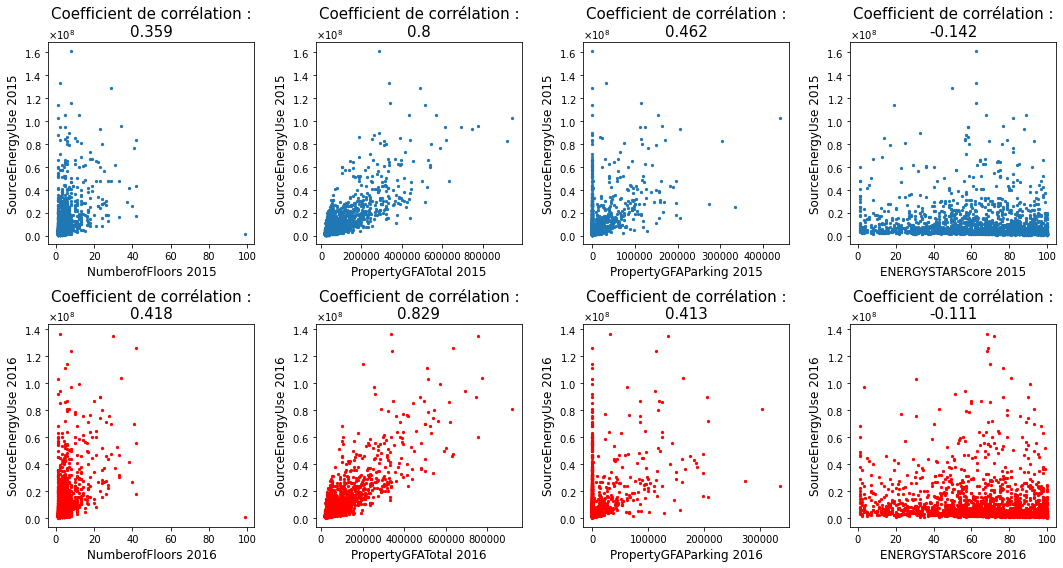

In [4]:
# avec la cible SourceEnergyUse

num_col = ["PropertyGFATotal", "PropertyGFAParking", "LargestPropertyUseTypeGFA", "ENERGYSTARScore"]

from matplotlib import ticker

fig, axes = plt.subplots(2, 4, figsize=(15,8))
axes = axes.ravel()

for i, col in enumerate(["NumberofFloors", "PropertyGFATotal", "PropertyGFAParking", "ENERGYSTARScore"]):
    ax = axes[i]
    corr = round(st.pearsonr(X_train_2015[col], y_train_energy_2015)[0],3)
    ax.set_title(f"Coefficient de corrélation :\n{corr}", fontsize=15)
    ax.scatter(X_train_2015[col], y_train_energy_2015, s=5)
    ax.set_xlabel(f"{col} 2015", fontsize=12)
    ax.set_ylabel(f"SourceEnergyUse 2015", fontsize=12)
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    ax.yaxis.set_major_formatter(formatter)   
    
    ax = axes[i+4]
    corr = round(st.pearsonr(X_train_2016[col], y_train_energy_2016)[0],3)
    ax.set_title(f"Coefficient de corrélation :\n{corr}", fontsize=15)
    ax.scatter(X_train_2016[col], y_train_energy_2016, c='r', s=5)
    ax.set_xlabel(f"{col} 2016", fontsize=12)
    ax.set_ylabel(f"SourceEnergyUse 2016", fontsize=12)
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    ax.yaxis.set_major_formatter(formatter)   

fig.tight_layout()
plt.savefig("SourceEnergyUse.png")
plt.show()

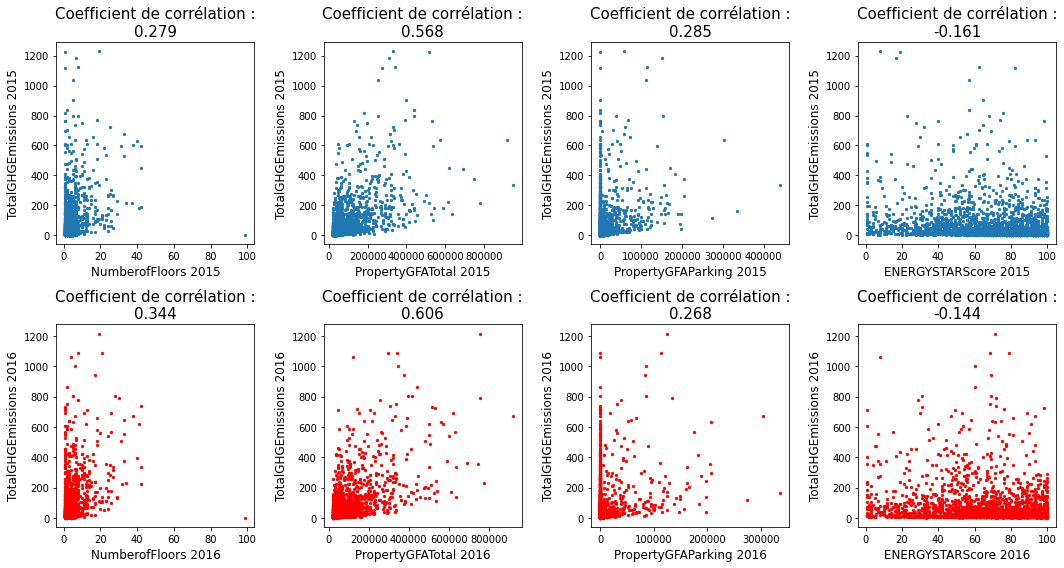

In [5]:
# avec la cible TotalGHGEmissions

fig, axes = plt.subplots(2, 4, figsize=(15,8))
axes = axes.ravel()

for i, col in enumerate(["NumberofFloors", "PropertyGFATotal", "PropertyGFAParking", "ENERGYSTARScore"]):
    ax = axes[i]
    corr = round(st.pearsonr(X_train_2015[col], y_train_emissions_2015)[0],3)
    ax.set_title(f"Coefficient de corrélation :\n{corr}", fontsize=15)
    ax.scatter(X_train_2015[col], y_train_emissions_2015, s=5)
    ax.set_xlabel(f"{col} 2015", fontsize=12)
    ax.set_ylabel(f"TotalGHGEmissions 2015", fontsize=12)
    
    ax = axes[i+4]
    corr = round(st.pearsonr(X_train_2016[col], y_train_emissions_2016)[0],3)
    ax.set_title(f"Coefficient de corrélation :\n{corr}", fontsize=15)
    ax.scatter(X_train_2016[col], y_train_emissions_2016, c='r', s=5)
    ax.set_xlabel(f"{col} 2016", fontsize=12)
    ax.set_ylabel(f"TotalGHGEmissions 2016", fontsize=12)

fig.tight_layout()
plt.savefig("TotalGHGEmissions.png")
plt.show()

# Etablissement d'une baseline

In [6]:
dict_performance = dict()

In [7]:
# régression naïve par médiane

start = time.time()

dict_res = dict()

dum = dummy.DummyRegressor(strategy='median')

dum.fit(X_train_2015, y_train_energy_2015)
y_pred = dum.predict(X_test_2015)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

dum.fit(X_train_2015, y_train_emissions_2015)
y_pred = dum.predict(X_test_2015)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

dum.fit(X_train_2016, y_train_energy_2016)
y_pred = dum.predict(X_test_2016)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

dum.fit(X_train_2016, y_train_emissions_2016)
y_pred = dum.predict(X_test_2016)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["Baseline"] = dict_res

La RMSE pour la cible SourceEnergyUse en 2015 est 13678596.49961887
La RMSE pour la cible TotalGHGEmissions en 2015 est 130.60806800563495
La RMSE pour la cible SourceEnergyUse en 2016 est 15643631.629048556
La RMSE pour la cible TotalGHGEmissions en 2016 est 142.3970987947979
Le temps d'éxécution est 0.005301952362060547 s


# Régression linéaire

In [8]:
# régression linéaire sans régularisation

start = time.time()

dict_res = dict()

scaler = preprocessing.StandardScaler()
reg = linear_model.LinearRegression()

scaler.fit(X_train_2015)
reg.fit(scaler.transform(X_train_2015), y_train_energy_2015)
y_pred = reg.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

reg.fit(scaler.transform(X_train_2015), y_train_emissions_2015)
y_pred = reg.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

scaler.fit(X_train_2016)
reg.fit(scaler.transform(X_train_2016), y_train_energy_2016)
y_pred = reg.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

reg.fit(scaler.transform(X_train_2016), y_train_emissions_2016)
y_pred = reg.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["Regression"] = dict_res

La RMSE pour la cible SourceEnergyUse en 2015 est 3.4786160152510775e+19
La RMSE pour la cible TotalGHGEmissions en 2015 est 432628106976538.6
La RMSE pour la cible SourceEnergyUse en 2016 est 4.613333961516869e+19
La RMSE pour la cible TotalGHGEmissions en 2016 est 645028647982006.9
Le temps d'éxécution est 0.21877384185791016 s


In [9]:
# régression avec régularisation Lasso
# coefficient de régularisation détecté par validation croisée

start = time.time()

dict_res = dict()

params = np.logspace(-5, 7, 200)
reg1 =linear_model.LassoCV(alphas=params, cv=5, n_jobs=6)
reg2 =linear_model.LassoCV(alphas=params, cv=5, n_jobs=6)
reg3 =linear_model.LassoCV(alphas=params, cv=5, n_jobs=6)
reg4 =linear_model.LassoCV(alphas=params, cv=5, n_jobs=6)

scaler.fit(X_train_2015)
reg1.fit(scaler.transform(X_train_2015), y_train_energy_2015)
y_pred = reg1.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

reg2.fit(scaler.transform(X_train_2015), y_train_emissions_2015)
y_pred = reg2.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

scaler.fit(X_train_2016)
reg3.fit(scaler.transform(X_train_2016), y_train_energy_2016)
y_pred = reg3.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

reg4.fit(scaler.transform(X_train_2016), y_train_emissions_2016)
y_pred = reg4.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["Lasso"] = dict_res

/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68010847392288.0, tolerance: 39469328405626.13
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123537270242688.0, tolerance: 40111132497427.67
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750920902235952.0, tolerance: 34393275739391.93
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate

/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0655552685169596e+16, tolerance: 34393275739391.93
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6154185410622644e+16, tolerance: 40111132497427.67
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.331331171048036e+16, tolerance: 39469328405626.13
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_mo

/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9670655592780004e+16, tolerance: 40111132497427.67
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.530301599390328e+16, tolerance: 34393275739391.93
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.675208871013601e+16, tolerance: 39469328405626.13
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_mod

/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.009444947553891e+16, tolerance: 40111132497427.67
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.743652006187064e+16, tolerance: 39469328405626.13
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.011262155615183e+16, tolerance: 40111132497427.67
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_mode

/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.021444628469467e+16, tolerance: 40111132497427.67
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6698051044162564e+16, tolerance: 34393275739391.93
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7605591760337184e+16, tolerance: 39469328405626.13
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_mo

/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.673428983161663e+16, tolerance: 34393275739391.93
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7647663914159e+16, tolerance: 39469328405626.13
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6736176221522908e+16, tolerance: 34393275739391.93
  model = cd_fast.enet_coordinate_descent_gram(
/home/samuel/.local/lib/python3.8/site-packages/sklearn/linear_model

La RMSE pour la cible SourceEnergyUse en 2015 est 6744167.801033786
La RMSE pour la cible TotalGHGEmissions en 2015 est 85.77046977048674
La RMSE pour la cible SourceEnergyUse en 2016 est 8149876.4705264345
La RMSE pour la cible TotalGHGEmissions en 2016 est 93.37271732792229
Le temps d'éxécution est 11.646394729614258 s


In [10]:
# coefficients obtenus

print(f"Pour la cible SourceEnergyUse2015\n")
print(f"Le coefficient alpha retenu par validation croisée est : {reg1.alpha_}\n")
print("Les dix premiers coefficients obtenus (classés par ordre décroissant d'importance) sont :")
print(sorted(list(zip(X_train_2016, reg1.coef_)), key=lambda x:abs(x[1]), reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2015\n")
print(f"Le coefficient alpha retenu par validation croisée est : {reg1.alpha_}\n")
print("Les dix premiers coefficients obtenus (classés par ordre décroissant d'importance) sont :")
print(sorted(list(zip(X_train_2016, reg1.coef_)), key=lambda x:abs(x[1]), reverse=True)[:10])
print("\n\n")

print(f"Pour la cible SourceEnergyUse2016\n")
print(f"Le coefficient alpha retenu par validation croisée est : {reg1.alpha_}\n")
print("Les dix premiers coefficients obtenus (classés par ordre décroissant d'importance) sont :")
print(sorted(list(zip(X_train_2016, reg1.coef_)), key=lambda x:abs(x[1]), reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2016\n")
print(f"Le coefficient alpha retenu par validation croisée est : {reg1.alpha_}\n")
print("Les dix premiers coefficients obtenus (classés par ordre décroissant d'importance) sont :")
print(sorted(list(zip(X_train_2016, reg1.coef_)), key=lambda x:abs(x[1]), reverse=True)[:10])
print("\n\n")

Pour la cible SourceEnergyUse2015

Le coefficient alpha retenu par validation croisée est : 135099.3521198025

Les dix premiers coefficients obtenus (classés par ordre décroissant d'importance) sont :
[('PropertyGFABuilding(s)', 8786431.111615004), ('ENERGYSTARScore', -2043436.195808646), ('PrimaryPropertyType_Low-Rise Multifamily', 1460845.8450353215), ('SecondLargestPropertyUseType_Enclosed Mall', 1442882.2525536104), ('Neighborhood_Ballard', 1435394.1456934568), ('SecondLargestPropertyUseType_Manufacturing/Industrial Plant', 1201311.5488236425), ('PropertyGFATotal', 1166412.2900283567), ('PrimaryPropertyType_Hotel', 931197.5887265668), ('LargestPropertyUseType_Medical Office', 896566.0821766213), ('ThirdLargestPropertyUseTypeGFA', 878457.0912436526)]



Pour la cible TotalGHGEmissions2015

Le coefficient alpha retenu par validation croisée est : 135099.3521198025

Les dix premiers coefficients obtenus (classés par ordre décroissant d'importance) sont :
[('PropertyGFABuilding(s)', 87

# Random Forest

In [11]:
# random forest avec paramètres par défaut

start = time.time()

dict_res = dict()

rf = ensemble.RandomForestRegressor(n_jobs=6)

rf.fit(X_train_2015, y_train_energy_2015)
y_pred = rf.predict(X_test_2015)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

rf.fit(X_train_2015, y_train_emissions_2015)
y_pred = rf.predict(X_test_2015)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

rf.fit(X_train_2016, y_train_energy_2016)
y_pred = rf.predict(X_test_2016)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

rf.fit(X_train_2016, y_train_emissions_2016)
y_pred = rf.predict(X_test_2016)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["RandomForest"] = dict_res

La RMSE pour la cible SourceEnergyUse en 2015 est 5880920.636298414
La RMSE pour la cible TotalGHGEmissions en 2015 est 69.72325735345328
La RMSE pour la cible SourceEnergyUse en 2016 est 7344953.292007338
La RMSE pour la cible TotalGHGEmissions en 2016 est 78.41416929236495
Le temps d'éxécution est 2.252002000808716 s


In [12]:
# random forest avec optimisation des paramètres par grid search avec validation croisée

start = time.time()

dict_res = dict()

params = {"n_estimators" : [100, 200, 500],
          "max_depth" : [10, 15, None],
          "min_samples_split" : [2, 5, 10]}
score="neg_root_mean_squared_error"
gs_rf1 = model_selection.GridSearchCV(ensemble.RandomForestRegressor(), params, cv=3, scoring=score, n_jobs=6)
gs_rf2 = model_selection.GridSearchCV(ensemble.RandomForestRegressor(), params, cv=3, scoring=score, n_jobs=6)
gs_rf3 = model_selection.GridSearchCV(ensemble.RandomForestRegressor(), params, cv=3, scoring=score, n_jobs=6)
gs_rf4 = model_selection.GridSearchCV(ensemble.RandomForestRegressor(), params, cv=3, scoring=score, n_jobs=6)

gs_rf1.fit(X_train_2015, y_train_energy_2015)
y_pred = gs_rf1.predict(X_test_2015)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

gs_rf2.fit(X_train_2015, y_train_emissions_2015)
y_pred = gs_rf2.predict(X_test_2015)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

gs_rf3.fit(X_train_2016, y_train_energy_2016)
y_pred = gs_rf3.predict(X_test_2016)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

gs_rf4.fit(X_train_2016, y_train_emissions_2016)
y_pred = gs_rf4.predict(X_test_2016)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["OptimizedRandomForest"] = dict_res

La RMSE pour la cible SourceEnergyUse en 2015 est 5849877.451836505
La RMSE pour la cible TotalGHGEmissions en 2015 est 69.07305868533798
La RMSE pour la cible SourceEnergyUse en 2016 est 7320320.788631753
La RMSE pour la cible TotalGHGEmissions en 2016 est 79.18932739024345
Le temps d'éxécution est 204.71993923187256 s


In [13]:
# paramètres obtenus

print(f"Pour la cible SourceEnergyUse2015\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_rf1.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_rf1.best_estimator_.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2015\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_rf2.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_rf2.best_estimator_.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible SourceEnergyUse2016\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_rf3.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_rf3.best_estimator_.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2016\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_rf4.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_rf4.best_estimator_.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

Pour la cible SourceEnergyUse2015

Les paramètres retenus par validation croisée sont : {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}

Importance des features (10 premières classées par ordre décroissant):
[('PropertyGFATotal', 0.4389269367992519), ('PropertyGFABuilding(s)', 0.2732140885926685), ('ENERGYSTARScore', 0.07580114099522302), ('LargestPropertyUseType_Museum', 0.016387580659146046), ('LargestPropertyUseTypeGFA', 0.015295550729919836), ('SecondLargestPropertyUseType_Enclosed Mall', 0.014918450248833088), ('BuildingType_NonResidential', 0.012347342007873104), ('YearBuilt', 0.01219960689861057), ('Neighborhood_Ballard', 0.00935559037020993), ('NumberofFloors', 0.008136440144779237)]



Pour la cible TotalGHGEmissions2015

Les paramètres retenus par validation croisée sont : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Importance des features (10 premières classées par ordre décroissant):
[('LargestPropertyUseTypeGFA', 0.2538240247633255), ('

# SVR

In [14]:
# régression par SVR linéaire

start = time.time()

dict_res = dict()

params = {"C" : np.logspace(-3, 3, 10)}
score="neg_root_mean_squared_error"
gs_linear_svr1 = model_selection.GridSearchCV(svm.LinearSVR(), params, cv=5, scoring=score, n_jobs=6)
gs_linear_svr2 = model_selection.GridSearchCV(svm.LinearSVR(), params, cv=5, scoring=score, n_jobs=6)
gs_linear_svr3 = model_selection.GridSearchCV(svm.LinearSVR(), params, cv=5, scoring=score, n_jobs=6)
gs_linear_svr4 = model_selection.GridSearchCV(svm.LinearSVR(), params, cv=5, scoring=score, n_jobs=6)

scaler.fit(X_train_2015)
gs_linear_svr1.fit(scaler.transform(X_train_2015), y_train_energy_2015)
y_pred = gs_linear_svr1.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

gs_linear_svr2.fit(scaler.transform(X_train_2015), y_train_emissions_2015)
y_pred = gs_linear_svr2.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

scaler.fit(X_train_2016)
gs_linear_svr3.fit(scaler.transform(X_train_2016), y_train_energy_2016)
y_pred = gs_linear_svr3.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

gs_linear_svr4.fit(scaler.transform(X_train_2016), y_train_emissions_2016)
y_pred = gs_linear_svr4.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["LinearSVR"] = dict_res

La RMSE pour la cible SourceEnergyUse en 2015 est 14169027.155290015
La RMSE pour la cible TotalGHGEmissions en 2015 est 93.54968573200095
La RMSE pour la cible SourceEnergyUse en 2016 est 16341620.682232734
La RMSE pour la cible TotalGHGEmissions en 2016 est 100.40854998900869
Le temps d'éxécution est 10.571801662445068 s


/home/samuel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [15]:
# paramètres obtenus

print(f"Pour la cible SourceEnergyUse2015\n")
print(f"Le coefficient C retenu par validation croisée est : {gs_linear_svr1.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_linear_svr1.best_estimator_.coef_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2015\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_linear_svr2.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_linear_svr2.best_estimator_.coef_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible SourceEnergyUse2016\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_linear_svr3.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_linear_svr3.best_estimator_.coef_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2016\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_linear_svr4.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_linear_svr4.best_estimator_.coef_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

Pour la cible SourceEnergyUse2015

Le coefficient C retenu par validation croisée est : {'C': 1000.0}

Importance des features (10 premières classées par ordre décroissant):
[('PropertyGFABuilding(s)', 118834.11529512086), ('PropertyGFATotal', 112561.27279340276), ('LargestPropertyUseTypeGFA', 111431.89997442908), ('SecondLargestPropertyUseTypeGFA', 61288.243793213165), ('YearBuilt', 58039.53680332451), ('PropertyGFAParking', 52944.51253430552), ('PrimaryPropertyType_Low-Rise Multifamily', 45986.08852322795), ('LargestPropertyUseType_Other', 40783.04541909703), ('BuildingType_Multifamily HR (10+)', 38734.92330591666), ('PrimaryPropertyType_Hospital', 37946.16214960438)]



Pour la cible TotalGHGEmissions2015

Les paramètres retenus par validation croisée sont : {'C': 0.46415888336127775}

Importance des features (10 premières classées par ordre décroissant):
[('LargestPropertyUseTypeGFA', 21.370839617886592), ('ThirdLargestPropertyUseType_Food Service', 19.23056657887473), ('SteamUse',

In [16]:
# régression par SVR linéaire avec passage au log de la cible
# paramètres optimisés par grid search et validation croisée

start = time.time()

dict_res = dict()

score="neg_root_mean_squared_error"

params = {"C" : np.logspace(2, 4, 5)}
gs_linear_svr1 = model_selection.GridSearchCV(svm.LinearSVR(), params, cv=5, scoring=score, n_jobs=6)
scaler.fit(X_train_2015)
gs_linear_svr1.fit(scaler.transform(X_train_2015), np.log(y_train_energy_2015))
y_pred = gs_linear_svr1.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, np.exp(y_pred)))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

params = {"C" : np.linspace(0, 1, 5)}
gs_linear_svr2 = model_selection.GridSearchCV(svm.LinearSVR(), params, cv=5, scoring=score, n_jobs=6)
gs_linear_svr2.fit(scaler.transform(X_train_2015), np.log(y_train_emissions_2015))
y_pred = gs_linear_svr2.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, np.exp(y_pred)))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

params = {"C" : np.logspace(2, 4, 5)}
gs_linear_svr3 = model_selection.GridSearchCV(svm.LinearSVR(), params, cv=5, scoring=score, n_jobs=6)
scaler.fit(X_train_2016)
gs_linear_svr3.fit(scaler.transform(X_train_2016), np.log(y_train_energy_2016))
y_pred = gs_linear_svr3.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, np.exp(y_pred)))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

params = {"C" : np.logspace(0, 2, 5)}
gs_linear_svr4 = model_selection.GridSearchCV(svm.LinearSVR(), params, cv=5, scoring=score, n_jobs=6)
gs_linear_svr4.fit(scaler.transform(X_train_2016), np.log(y_train_emissions_2016))
y_pred = gs_linear_svr4.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, np.exp(y_pred)))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["LogLinearSVR"] = dict_res

/home/samuel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


La RMSE pour la cible SourceEnergyUse en 2015 est 1473666300.4059012


/home/samuel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


La RMSE pour la cible TotalGHGEmissions en 2015 est 749.2988303481297


/home/samuel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


La RMSE pour la cible SourceEnergyUse en 2016 est 93561515.81569555
La RMSE pour la cible TotalGHGEmissions en 2016 est 144.5770348740642
Le temps d'éxécution est 26.873604774475098 s


/home/samuel/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [17]:
# paramètres obtenus

print(f"Pour la cible SourceEnergyUse2015\n")
print(f"Le coefficient C retenu par validation croisée est : {gs_linear_svr1.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_linear_svr1.best_estimator_.coef_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2015\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_linear_svr2.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_linear_svr2.best_estimator_.coef_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible SourceEnergyUse2016\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_linear_svr3.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_linear_svr3.best_estimator_.coef_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2016\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_linear_svr4.best_params_}\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns, gs_linear_svr4.best_estimator_.coef_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

Pour la cible SourceEnergyUse2015

Le coefficient C retenu par validation croisée est : {'C': 3162.2776601683795}

Importance des features (10 premières classées par ordre décroissant):
[('PropertyGFABuilding(s)', 0.5970252532134882), ('PropertyGFATotal', 0.4561271086947812), ('BuildingType_Nonresidential COS', 0.21497640846515534), ('PrimaryPropertyType_Hospital', 0.17935968677608138), ('BuildingType_NonResidential', 0.13223131308091624), ('BuildingType_Campus', 0.12027710032453866), ('PrimaryPropertyType_Mixed Use Property', 0.11549993335320502), ('ThirdLargestPropertyUseType_Pre-school/Daycare', 0.103903838978369), ('PrimaryPropertyType_Low-Rise Multifamily', 0.10089643281568311), ('PrimaryPropertyType_Small- and Mid-Sized Office', 0.09882553525432564)]



Pour la cible TotalGHGEmissions2015

Les paramètres retenus par validation croisée sont : {'C': 0.25}

Importance des features (10 premières classées par ordre décroissant):
[('GasUse', 0.7750919004931487), ('LargestPropertyUseTyp

In [18]:
# régression par SVR avec noyau rbf
# paramètres optimisés par grid search et validation croisée

start = time.time()

dict_res = dict()

score="neg_root_mean_squared_error"

params = {"C" : np.logspace(2, 4, 7),
          "gamma" : np.logspace(-4, -2, 7)}
gs_svr1 = model_selection.GridSearchCV(svm.SVR(), params, cv=5, scoring=score, n_jobs=6)
scaler.fit(X_train_2015)
gs_svr1.fit(scaler.transform(X_train_2015), y_train_energy_2015)
y_pred = gs_svr1.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

params = {"C" : np.logspace(2, 4, 7),
          "gamma" : np.logspace(-4, -2, 7)}
gs_svr2 = model_selection.GridSearchCV(svm.SVR(), params, cv=5, scoring=score, n_jobs=6)
gs_svr2.fit(scaler.transform(X_train_2015), y_train_emissions_2015)
y_pred = gs_svr2.predict(scaler.transform(X_test_2015))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

params = {"C" : np.logspace(2, 4, 7),
          "gamma" : np.logspace(-4, -2, 7)}
gs_svr3 = model_selection.GridSearchCV(svm.SVR(), params, cv=5, scoring=score, n_jobs=6)
scaler.fit(X_train_2016)
gs_svr3.fit(scaler.transform(X_train_2016), y_train_energy_2016)
y_pred = gs_svr3.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

params = {"C" : np.logspace(2, 4, 7),
          "gamma" : np.logspace(-4, -2, 7)}
gs_svr4 = model_selection.GridSearchCV(svm.SVR(), params, cv=5, scoring=score, n_jobs=6)
gs_svr4.fit(scaler.transform(X_train_2016), y_train_emissions_2016)
y_pred = gs_svr4.predict(scaler.transform(X_test_2016))
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["RbfSVR"] = dict_res

La RMSE pour la cible SourceEnergyUse en 2015 est 13384021.38508548
La RMSE pour la cible TotalGHGEmissions en 2015 est 89.3348410113643
La RMSE pour la cible SourceEnergyUse en 2016 est 15377333.431255227
La RMSE pour la cible TotalGHGEmissions en 2016 est 86.40872722601732
Le temps d'éxécution est 315.27388548851013 s


In [19]:
# paramètres obtenus

print(f"Pour la cible SourceEnergyUse2015\n")
print(f"Le coefficient C retenu par validation croisée est : {gs_svr1.best_params_}\n")
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2015\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_svr2.best_params_}\n")
print("\n\n")

print(f"Pour la cible SourceEnergyUse2016\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_svr3.best_params_}\n")
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2016\n")
print(f"Les paramètres retenus par validation croisée sont : {gs_svr4.best_params_}\n")
print("\n\n")

Pour la cible SourceEnergyUse2015

Le coefficient C retenu par validation croisée est : {'C': 10000.0, 'gamma': 0.01}




Pour la cible TotalGHGEmissions2015

Les paramètres retenus par validation croisée sont : {'C': 10000.0, 'gamma': 0.001}




Pour la cible SourceEnergyUse2016

Les paramètres retenus par validation croisée sont : {'C': 10000.0, 'gamma': 0.01}




Pour la cible TotalGHGEmissions2016

Les paramètres retenus par validation croisée sont : {'C': 10000.0, 'gamma': 0.001}






# XGBoost

In [20]:
# régression par XGBoost avec les paramètres de base

start = time.time()

dict_res = dict()

xgb1 = XGBRegressor(n_jobs=6)
xgb2 = XGBRegressor(n_jobs=6)
xgb3 = XGBRegressor(n_jobs=6)
xgb4 = XGBRegressor(n_jobs=6)

xgb1.fit(X_train_2015, y_train_energy_2015, 
             early_stopping_rounds=5, 
             eval_set=[(X_test_2015, y_test_energy_2015)],
             verbose=False)
y_pred = xgb1.predict(X_test_2015)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE}")
dict_res["RMSESourceEnergyUse2015"] = RMSE

xgb2.fit(X_train_2015, y_train_emissions_2015, 
             early_stopping_rounds=5, 
             eval_set=[(X_test_2015, y_test_emissions_2015)],
             verbose=False)
y_pred = xgb2.predict(X_test_2015)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE

xgb3.fit(X_train_2016, y_train_energy_2016, 
             early_stopping_rounds=5, 
             eval_set=[(X_test_2016, y_test_energy_2016)],
             verbose=False)
y_pred = xgb3.predict(X_test_2016)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE}")
dict_res["RMSESourceEnergyUse2016"] = RMSE

xgb4.fit(X_train_2016, y_train_emissions_2016, 
             early_stopping_rounds=5, 
             eval_set=[(X_test_2016, y_test_emissions_2016)],
             verbose=False)
y_pred = xgb4.predict(X_test_2016)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["XGBoost"] = dict_res

La RMSE pour la cible SourceEnergyUse en 2015 est 5633625.945277536
La RMSE pour la cible TotalGHGEmissions en 2015 est 66.72522218533476
La RMSE pour la cible SourceEnergyUse en 2016 est 7071173.716794233
La RMSE pour la cible TotalGHGEmissions en 2016 est 77.89469343170813
Le temps d'éxécution est 0.6470935344696045 s


In [21]:
# classement des features 


print(f"Pour la cible SourceEnergyUse2015\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns,xgb1.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2015\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns,xgb2.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible SourceEnergyUse2016\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns,xgb3.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2016\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns,xgb4.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

Pour la cible SourceEnergyUse2015

Importance des features (10 premières classées par ordre décroissant):
[('PropertyGFATotal', 0.19110584), ('PropertyGFABuilding(s)', 0.08199768), ('LargestPropertyUseType_Museum', 0.07450568), ('Neighborhood_North', 0.061781198), ('ThirdLargestPropertyUseType_Medical Office', 0.048411496), ('ThirdLargestPropertyUseType_Office', 0.040140893), ('BuildingType_Multifamily MR (5-9)', 0.02596375), ('PrimaryPropertyType_Low-Rise Multifamily', 0.022592261), ('BuildingType_NonResidential', 0.022521792), ('ENERGYSTARScore', 0.021742294)]



Pour la cible TotalGHGEmissions2015

Importance des features (10 premières classées par ordre décroissant):
[('BuildingType_Multifamily MR (5-9)', 0.0782242), ('PrimaryPropertyType_Other', 0.069985114), ('PropertyGFABuilding(s)', 0.065407395), ('GasUse', 0.04921803), ('Neighborhood_LAKE UNION', 0.047346525), ('SteamUse', 0.04622932), ('LargestPropertyUseTypeGFA', 0.045295414), ('PropertyGFATotal', 0.04485571), ('ElectricityU

In [22]:
# régression par XGBoost avec sélection des paramètres

start = time.time()

dict_res = dict()

l_rate = 0.05
params_by_tree = [0.6, 0.7, 0.8]
res_by_tree = []
params_by_level = [0.5, 0.7, 0.9]
res_by_level = []
rmse1 = []
rmse2 = []
rmse3 = []
rmse4 = []

for by_tree in params_by_tree:
    for by_level in params_by_level :
        
        res_by_tree.append(by_tree)
        res_by_level.append(by_level)

        xgb1 = XGBRegressor(n_estimators=1000, learning_rate=l_rate, 
                            colsample_bytree=by_tree, colsample_bylevel=by_level, 
                            n_jobs=6)
        xgb1.fit(X_train_2015, y_train_energy_2015, 
                     early_stopping_rounds=5, 
                     eval_set=[(X_test_2015, y_test_energy_2015)],
                     verbose=False)
        y_pred = xgb1.predict(X_test_2015)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2015, y_pred))
        rmse1.append(RMSE)
        
        xgb2 = XGBRegressor(n_estimators=1000, learning_rate=l_rate, 
                            colsample_bytree=by_tree, colsample_bylevel=by_level, 
                            n_jobs=6)
        xgb2.fit(X_train_2015, y_train_emissions_2015, 
                     early_stopping_rounds=5, 
                     eval_set=[(X_test_2015, y_test_emissions_2015)],
                     verbose=False)
        y_pred = xgb2.predict(X_test_2015)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2015, y_pred))
        rmse2.append(RMSE)

        xgb3 = XGBRegressor(n_estimators=1000, learning_rate=l_rate, 
                            colsample_bytree=by_tree, colsample_bylevel=by_level, 
                            n_jobs=6)
        xgb3.fit(X_train_2016, y_train_energy_2016, 
                     early_stopping_rounds=5, 
                     eval_set=[(X_test_2016, y_test_energy_2016)],
                     verbose=False)
        y_pred = xgb3.predict(X_test_2016)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test_energy_2016, y_pred))
        rmse3.append(RMSE)
        
        xgb4 = XGBRegressor(n_estimators=1000, learning_rate=l_rate, 
                            colsample_bytree=by_tree, colsample_bylevel=by_level, 
                            n_jobs=6)
        xgb4.fit(X_train_2016, y_train_emissions_2016, 
                     early_stopping_rounds=5, 
                     eval_set=[(X_test_2016, y_test_emissions_2016)],
                     verbose=False)
        y_pred = xgb4.predict(X_test_2016)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test_emissions_2016, y_pred))
        rmse4.append(RMSE)

RMSE = min(rmse1)  
ind = rmse1.index(RMSE)
print(f"La RMSE pour la cible SourceEnergyUse en 2015 est {RMSE} avec colsample_bytree={res_by_tree[ind]} et colsample_bylevel={res_by_level[ind]}")
dict_res["RMSESourceEnergyUse2015"] = RMSE  
RMSE = min(rmse2)
ind = rmse2.index(RMSE)
print(f"La RMSE pour la cible TotalGHGEmissions en 2015 est {RMSE} avec colsample_bytree={res_by_tree[ind]} et colsample_bylevel={res_by_level[ind]}")
dict_res["RMSETotalGHGEmissions2015"] = RMSE
RMSE = min(rmse3)
ind = rmse3.index(RMSE)
print(f"La RMSE pour la cible SourceEnergyUse en 2016 est {RMSE} avec colsample_bytree={res_by_tree[ind]} et colsample_bylevel={res_by_level[ind]}")
dict_res["RMSESourceEnergyUse2016"] = RMSE
RMSE = min(rmse4) 
ind = rmse4.index(RMSE)
print(f"La RMSE pour la cible TotalGHGEmissions en 2016 est {RMSE} avec colsample_bytree={res_by_tree[ind]} et colsample_bylevel={res_by_level[ind]}")
dict_res["RMSETotalGHGEmissions2016"] = RMSE

interval = time.time()-start
dict_res["Time"] = interval

print(f"Le temps d'éxécution est {interval} s")

dict_performance["OptimizedXGBoost"] = dict_res

La RMSE pour la cible SourceEnergyUse en 2015 est 4944528.20650986 avec colsample_bytree=0.8 et colsample_bylevel=0.7
La RMSE pour la cible TotalGHGEmissions en 2015 est 65.59668631961596 avec colsample_bytree=0.8 et colsample_bylevel=0.5
La RMSE pour la cible SourceEnergyUse en 2016 est 6461359.969565419 avec colsample_bytree=0.6 et colsample_bylevel=0.9
La RMSE pour la cible TotalGHGEmissions en 2016 est 74.18222566526192 avec colsample_bytree=0.8 et colsample_bylevel=0.9
Le temps d'éxécution est 13.25307035446167 s


In [23]:
# classement des features 


print(f"Pour la cible SourceEnergyUse2015\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns,xgb1.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2015\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns,xgb2.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible SourceEnergyUse2016\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns,xgb3.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

print(f"Pour la cible TotalGHGEmissions2016\n")
print("Importance des features (10 premières classées par ordre décroissant):")
print(sorted(list(zip(X_test_2016.columns,xgb4.feature_importances_)), key=lambda x:x[1], reverse=True)[:10])
print("\n\n")

Pour la cible SourceEnergyUse2015

Importance des features (10 premières classées par ordre décroissant):
[('PropertyGFATotal', 0.15336075), ('LargestPropertyUseType_Museum', 0.07903749), ('PropertyGFABuilding(s)', 0.068939306), ('PrimaryPropertyType_Low-Rise Multifamily', 0.024385003), ('Neighborhood_North', 0.022616655), ('BuildingType_Multifamily MR (5-9)', 0.022180974), ('BuildingType_NonResidential', 0.021206314), ('Neighborhood_Ballard', 0.021047208), ('PrimaryPropertyType_Laboratory', 0.019856721), ('BuildingType_Nonresidential WA', 0.019826815)]



Pour la cible TotalGHGEmissions2015

Importance des features (10 premières classées par ordre décroissant):
[('LargestPropertyUseTypeGFA', 0.04758044), ('GasUse', 0.04232215), ('PropertyGFATotal', 0.039677914), ('PrimaryPropertyType_Mixed Use Property', 0.038638335), ('SteamUse', 0.038287442), ('ElectricityUse', 0.036522895), ('PropertyGFABuilding(s)', 0.029224988), ('PrimaryPropertyType_Other', 0.027365206), ('BuildingType_Multifami

# Représentations graphiques des performances

In [24]:
# attribution des couleurs

dict_performance["Baseline"]["Color"] = '#000000'
dict_performance["Regression"]["Color"] = '#a6cee3'
dict_performance["Lasso"]["Color"] = '#1f78b4'
dict_performance["RandomForest"]["Color"] = '#b2df8a'
dict_performance["OptimizedRandomForest"]["Color"] = '#33a02c'
dict_performance["LinearSVR"]["Color"] = '#fb9a99'
dict_performance["LogLinearSVR"]["Color"] = '#e31a1c'
dict_performance["RbfSVR"]["Color"] = '#fdbf6f'
dict_performance["XGBoost"]["Color"] = '#ff7f00'
dict_performance["OptimizedXGBoost"]["Color"] = '#cab2d6'


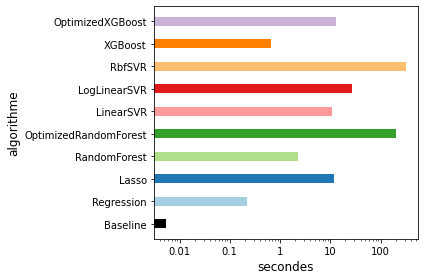

In [25]:
# graphique des temps d'éxécution (abscisses logarithmiques)

times = [(key, dict_performance[key]["Time"], dict_performance[key]["Color"]) for key in dict_performance.keys()]

height = [x[1] for x in times]
labels = [x[0] for x in times]
colors = [x[2] for x in times]

fig = plt.figure()
ax= plt.subplot(111)
plt.xscale('log')
ax.barh(range(1,21,2),height,color=colors)
ax.set_yticks(range(1,21,2))
ax.set_yticklabels(labels)
ax.set_xlabel("secondes", fontsize=12)
ax.set_ylabel("algorithme", fontsize=12)

ax.set_xticklabels( ['{:0.2g}'.format(l) if int(l)!=float(l) else '{:0.0f}'.format(l) 
                      for l in ax.get_xticks()] )

fig.tight_layout()
plt.savefig("TempsBis.png")

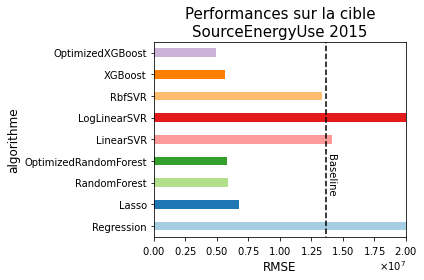

In [26]:
# graphique des RMSE cible SourceEnergyUse2015

RMSE = [(key, dict_performance[key]["RMSESourceEnergyUse2015"], dict_performance[key]["Color"]) 
         for key in dict_performance.keys()]
base = RMSE.pop(0)[1]

height = [x[1] for x in RMSE]
labels = [x[0] for x in RMSE]
colors = [x[2] for x in RMSE]

fig = plt.figure()
ax = plt.subplot(111)

ax.barh(range(1,19,2),height,color=colors)

ax.plot([base,base], [-0.5,18.5], color='k', ls ="--")
ax.text(base,4,"Baseline", rotation=270)
ax.set_yticks(range(1,21,2))
ax.set_yticklabels(labels)
ax.set_xlabel("RMSE", fontsize=12)
ax.set_ylabel("algorithme", fontsize=12)
ax.set_title("Performances sur la cible\nSourceEnergyUse 2015", fontsize=15)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
ax.xaxis.set_major_formatter(formatter)
plt.xlim([0, 20000000])
plt.ylim([0,18])

fig.tight_layout()
plt.savefig("RMSESourceEnergyUse2015Bis.png")

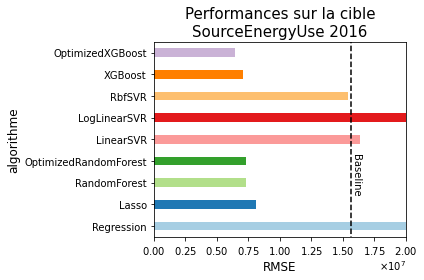

In [27]:
# graphique des RMSE cible SourceEnergyUse2016

RMSE = [(key, dict_performance[key]["RMSESourceEnergyUse2016"], dict_performance[key]["Color"]) 
         for key in dict_performance.keys()]
base = RMSE.pop(0)[1]

height = [x[1] for x in RMSE]
labels = [x[0] for x in RMSE]
colors = [x[2] for x in RMSE]

fig = plt.figure()
ax = plt.subplot(111)

ax.barh(range(1,19,2),height,color=colors)

ax.plot([base,base], [-0.5,18.5], color='k', ls ="--")
ax.text(base,4,"Baseline", rotation=270)
ax.set_yticks(range(1,21,2))
ax.set_yticklabels(labels)
ax.set_xlabel("RMSE", fontsize=12)
ax.set_ylabel("algorithme", fontsize=12)
ax.set_title("Performances sur la cible\nSourceEnergyUse 2016", fontsize=15)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
ax.xaxis.set_major_formatter(formatter)
plt.xlim([0, 20000000])
plt.ylim([0,18])

fig.tight_layout()
plt.savefig("RMSESourceEnergyUse2016Bis.png")

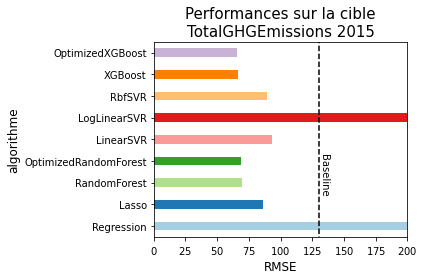

In [28]:
# graphique des RMSE cible TotalGHGEmmissions2015

RMSE = [(key, dict_performance[key]["RMSETotalGHGEmissions2015"], dict_performance[key]["Color"]) 
         for key in dict_performance.keys()]
base = RMSE.pop(0)[1]

height = [x[1] for x in RMSE]
labels = [x[0] for x in RMSE]
colors = [x[2] for x in RMSE]

fig = plt.figure()
ax = plt.subplot(111)

ax.barh(range(1,19,2),height,color=colors)

ax.plot([base,base], [-0.5,18.5], color='k', ls ="--")
ax.text(base,4,"Baseline", rotation=270)
ax.set_yticks(range(1,21,2))
ax.set_yticklabels(labels)
ax.set_xlabel("RMSE", fontsize=12)
ax.set_ylabel("algorithme", fontsize=12)
ax.set_title("Performances sur la cible\nTotalGHGEmissions 2015", fontsize=15)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
ax.xaxis.set_major_formatter(formatter)
plt.xlim([0, 200])
plt.ylim([0,18])

fig.tight_layout()
plt.savefig("RMSETotalGHGEmissions2015Bis.png")

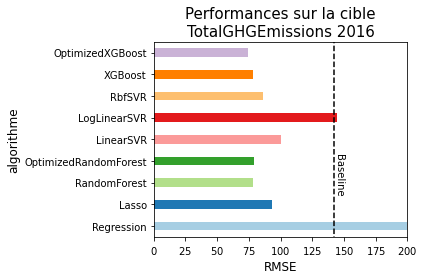

In [29]:
# graphique des RMSE cible TotalGHGEmmissions2016

RMSE = [(key, dict_performance[key]["RMSETotalGHGEmissions2016"], dict_performance[key]["Color"]) 
         for key in dict_performance.keys()]
base = RMSE.pop(0)[1]

height = [x[1] for x in RMSE]
labels = [x[0] for x in RMSE]
colors = [x[2] for x in RMSE]

fig = plt.figure()
ax = plt.subplot(111)

ax.barh(range(1,19,2),height,color=colors)

ax.plot([base,base], [-0.5,18.5], color='k', ls ="--")
ax.text(base,4,"Baseline", rotation=270)
ax.set_yticks(range(1,21,2))
ax.set_yticklabels(labels)
ax.set_xlabel("RMSE", fontsize=12)
ax.set_ylabel("algorithme", fontsize=12)
ax.set_title("Performances sur la cible\nTotalGHGEmissions 2016", fontsize=15)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
ax.xaxis.set_major_formatter(formatter)
plt.xlim([0, 200])
plt.ylim([0,18])

fig.tight_layout()
plt.savefig("RMSETotalGHGEmissions2016Bis.png")